# LETS GROW MORE-DATA SCIENCE INTERN

# BEGINNER LEVEL TASK

# TASK-2:STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

In [ ]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<Axes: >

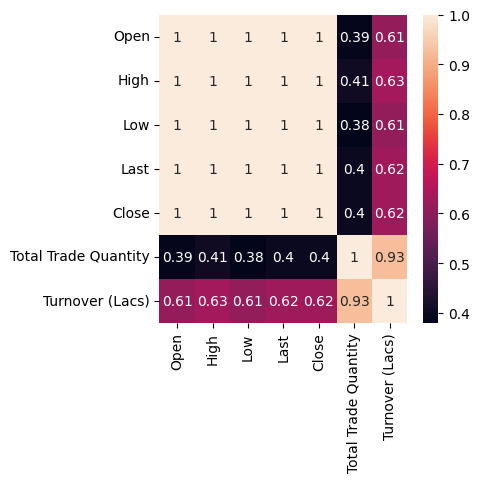

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Set Target Variable
output_var=pd.DataFrame(df['Close'])
#Selecting the Features
features=['Open', 'High', 'Low', 'Total Trade Quantity']

In [ ]:
#Scaling
scaler=MinMaxScaler()
feature_transform=scaler.fit_transform(df[features])
feature_transform=pd.DataFrame(columns=features,data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Total Trade Quantity
2034,0.166261,0.163448,0.169874,0.021236
2033,0.158962,0.159382,0.166563,0.008703
2032,0.165045,0.159179,0.166563,0.008291
2031,0.158151,0.155316,0.153528,0.021228
2030,0.148013,0.149217,0.132423,0.018747


In [ ]:
timesplit=TimeSeriesSplit(n_splits=10)
for train_index,test_index in timesplit.split(feature_transform):
        X_train,X_test=feature_transform[:len(train_index)],feature_transform[len(train_index):(len(train_index)+len(test_index))]
        y_train,y_test=output_var[:len(train_index)].values.ravel(),output_var[len(train_index):(len(train_index)+len(test_index))]

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train=trainX.reshape(X_train.shape[0],1,X_train.shape[1])
X_test=testX.reshape(X_test.shape[0],1,X_test.shape[1])

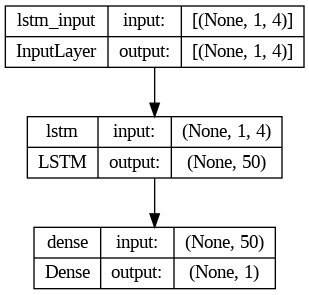

In [ ]:
#Building the LSTM Model
lstm=Sequential()
lstm.add(LSTM(50,input_shape=(1,trainX.shape[1]),activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=200,batch_size=8,verbose=1,shuffle=False)

Epoch 1/200
232/232 [==============================] - 2s 2ms/step - loss: 19578.7188
Epoch 2/200
232/232 [==============================] - 0s 2ms/step - loss: 17362.1797
Epoch 3/200
232/232 [==============================] - 0s 2ms/step - loss: 12948.7676
Epoch 4/200
232/232 [==============================] - 0s 2ms/step - loss: 7643.3896
Epoch 5/200
232/232 [==============================] - 0s 2ms/step - loss: 3402.3230
Epoch 6/200
232/232 [==============================] - 0s 2ms/step - loss: 1090.7303
Epoch 7/200
232/232 [==============================] - 0s 2ms/step - loss: 255.0494
Epoch 8/200
232/232 [==============================] - 0s 2ms/step - loss: 60.9792
Epoch 9/200
232/232 [==============================] - 0s 2ms/step - loss: 30.8889
Epoch 10/200
232/232 [==============================] - 0s 2ms/step - loss: 26.5847
Epoch 11/200
232/232 [==============================] - 0s 2ms/step - loss: 25.0766
Epoch 12/200
232/232 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 2ms/step


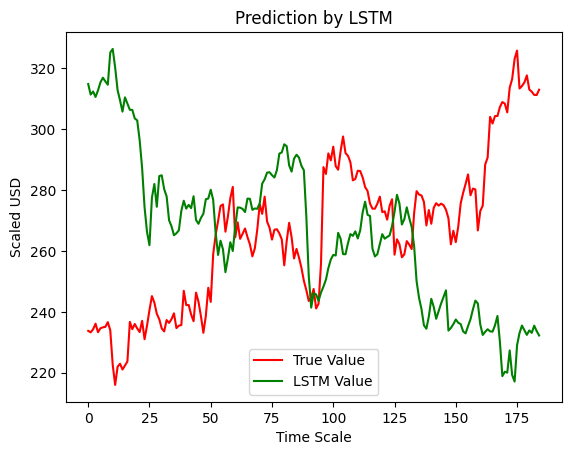

In [ ]:
y_pred= lstm.predict(X_test)
plt.plot(y_test, label='True Value' , color='red')
plt.plot(y_pred, label='LSTM Value', color='green')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()